In [1]:
# import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Exploratory Data Analysis

In [2]:
df = pd.read_csv('ingredient.csv')

a) A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [4]:
df.shape

(214, 9)

In [5]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [7]:
skewness = df.skew() 
kurtosis = df.kurt()

data = {'Skewness': skewness, 'Kurtosis': kurtosis} 
  
df_skew_kurt = pd.DataFrame(data)
print(df_skew_kurt)

   Skewness   Kurtosis
a  1.625431   4.931737
b  0.454181   3.052232
c -1.152559  -0.410319
d  0.907290   2.060569
e -0.730447   2.967903
f  6.551648  54.689699
g  2.047054   6.681978
h  3.416425  12.541084
i  1.754327   2.662016


In [8]:
df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

There is no missing value detected. The data types of the variable are numerical values.

b) A graphical analysis of the additives, including a distribution study.

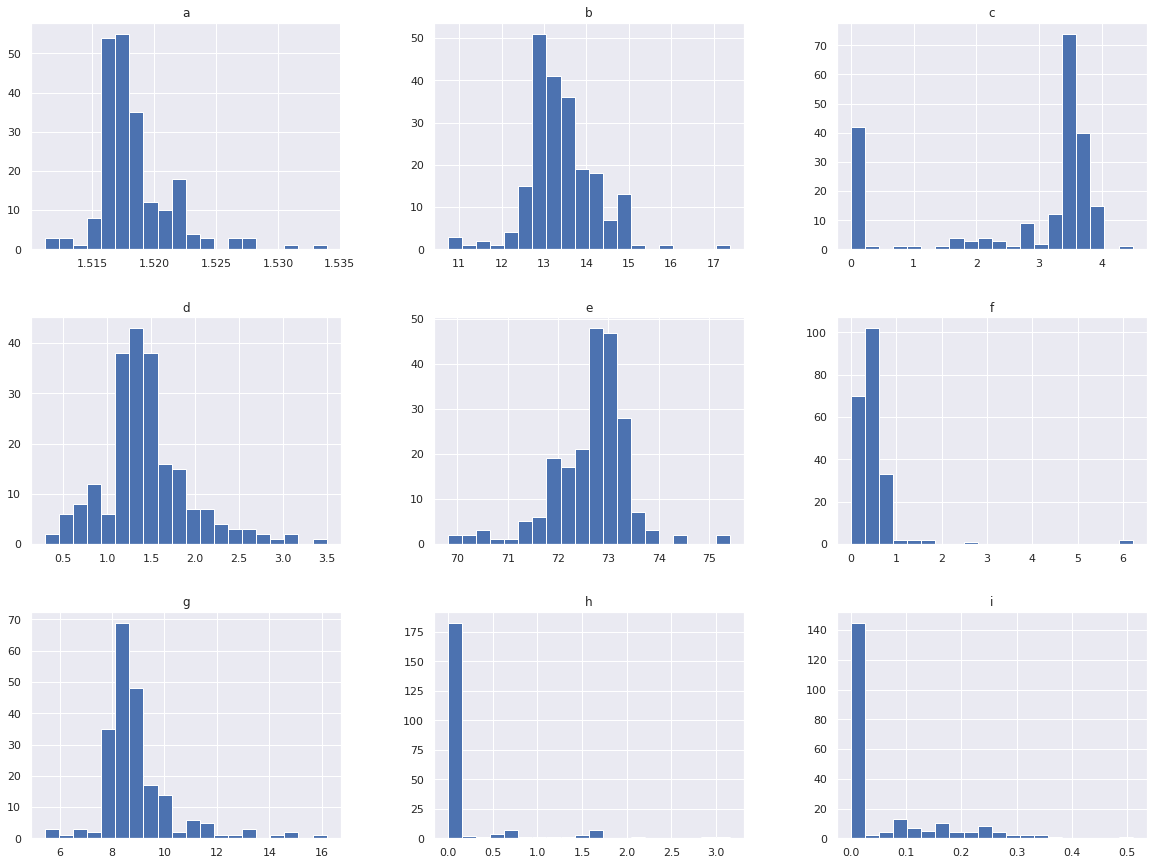

In [9]:
# Distribution
df.hist(bins=20, figsize=(20,15))
plt.show()

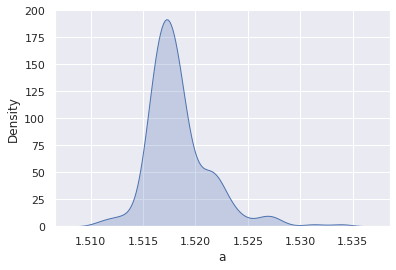

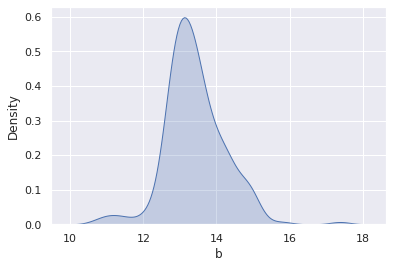

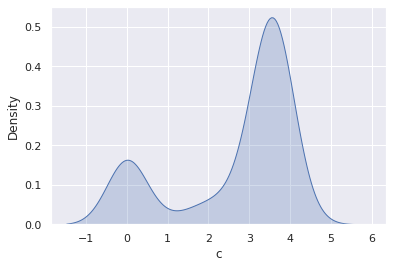

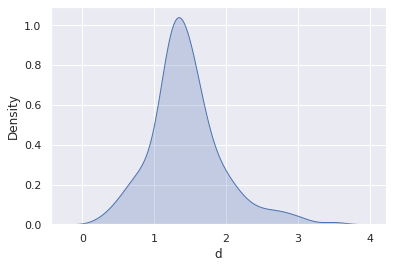

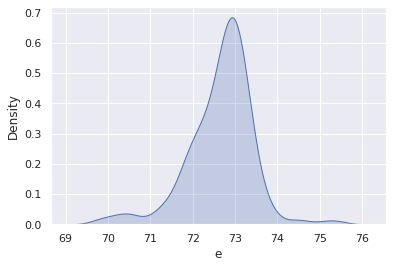

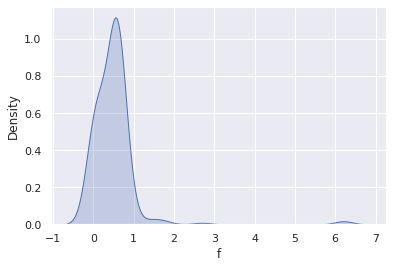

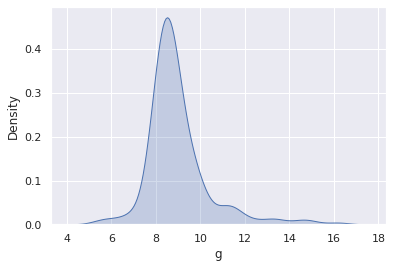

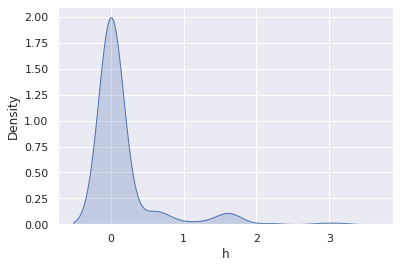

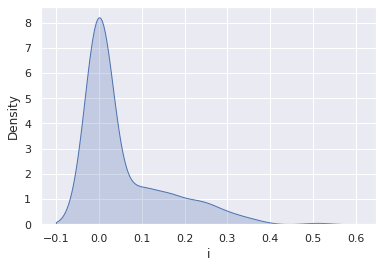

In [10]:
vars = ['a','b','c','d','e','f','g','h','i']
def density_plot (data, var):
  data = data.copy()
  sns.kdeplot(data[var], shade=True, color="b")
  plt.show()

for var in vars:
  density_plot(df, var)

From the distribution and descriptive statistics, we can conclude that most of the variables are highly skewed. The skewness of variable f, g and h are more than 0 which are right-skewed. 

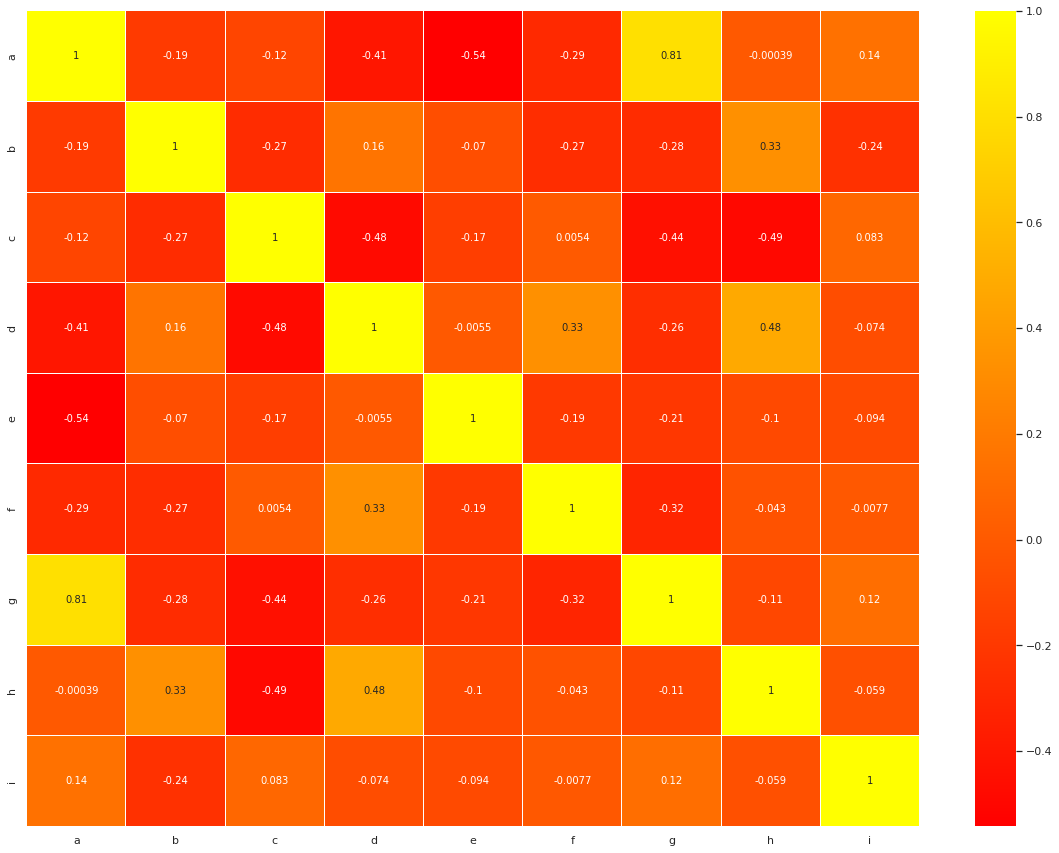

In [11]:
sns.heatmap(df.corr(), annot=True,  cmap='autumn', linewidth=0.1)
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

From the heatmap, we can observe variables a & g are highly correlated where the coefficient value more than 0.7. There is a multi-collinearity relationship between a and g. 

Visualizing Outliers

<Figure size 1120x640 with 0 Axes>

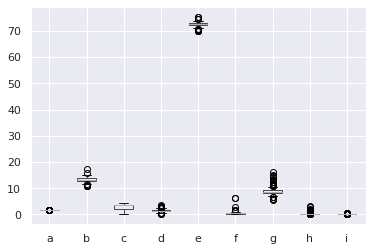

<Figure size 1120x640 with 0 Axes>

In [40]:
df.boxplot()

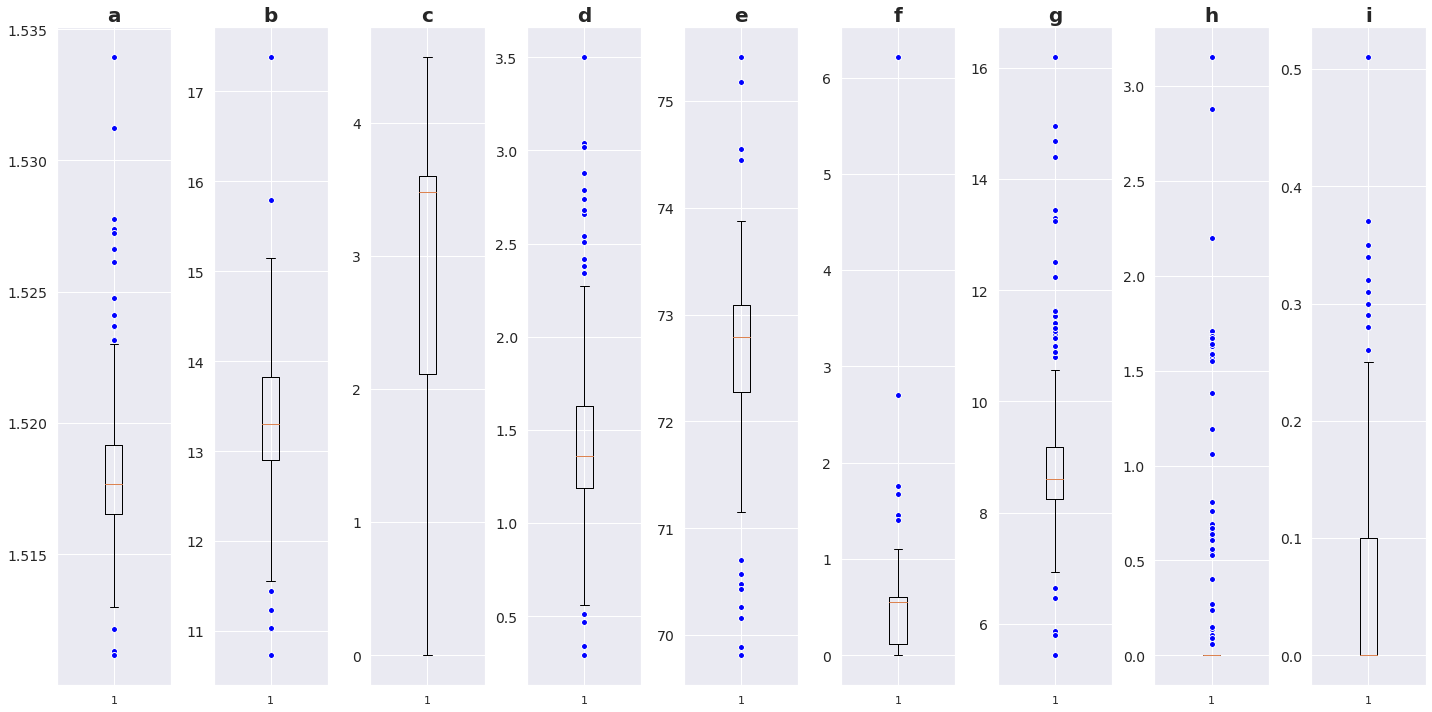

In [13]:
out = dict(markerfacecolor='blue', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=out)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

c) A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

In [14]:
# Setting the number of clusters
from sklearn.cluster import KMeans

In [15]:
x = df.copy()

In [16]:
# determining the optimal number of clusters using the Elbow method
wcss=[]

for i in range(1,11):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

In [17]:
wcss

[1342.7570466443026,
 820.0278544371247,
 589.0314496288754,
 489.3997878789525,
 402.3547702794317,
 336.29263337746863,
 292.63875966738533,
 266.51325586328414,
 252.11459285003883,
 229.19103928739057]

Text(0, 0.5, 'Within-cluster Sum of Squares')

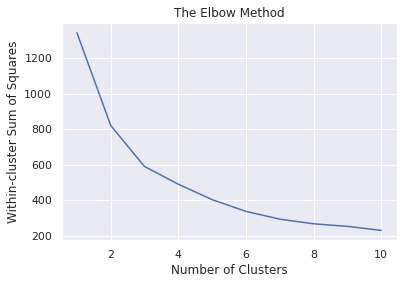

In [18]:
number_clusters = range(1,11)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

Optimal clusters: 3

Categorize the data using the optimum number of clusters:

In [19]:
kmeans = KMeans(3)

In [20]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       1, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [21]:
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters.head()

,a,b,c,d,e,f,g,h,i,Cluster
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,0
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,0
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,0
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,0


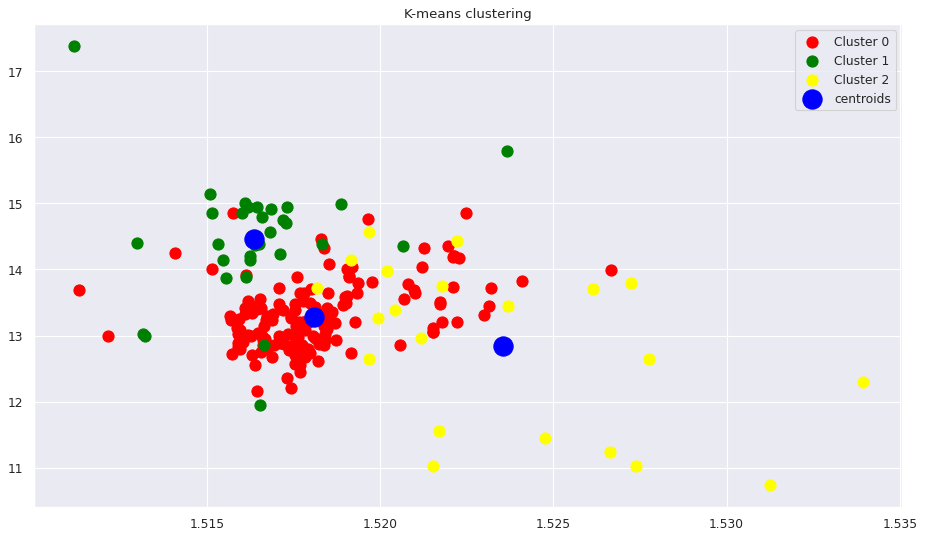

In [39]:
plt.figure(figsize=(14,8),dpi=80)
plt.scatter(x.iloc[identified_clusters == 0, 0], x.iloc[identified_clusters == 0, 1], s=100, c='red', label='Cluster 0')
plt.scatter(x.iloc[identified_clusters == 1, 0], x.iloc[identified_clusters == 1, 1], s=100, c='green', label='Cluster 1')
plt.scatter(x.iloc[identified_clusters == 2, 0], x.iloc[identified_clusters == 2, 1], s=100, c='yellow', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'centroids' )
plt.title('K-means clustering')
plt.legend()
plt.show()

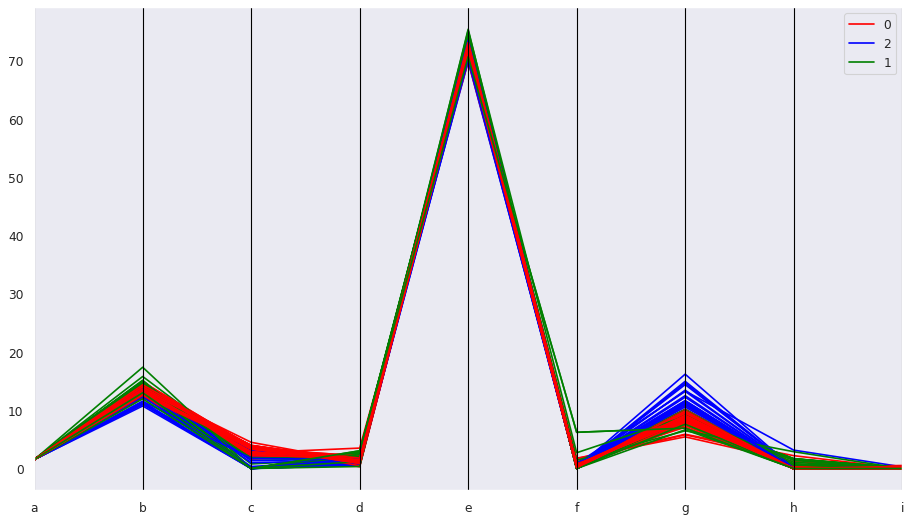

In [38]:
plt.figure(figsize=(14,8),dpi=80)
pd.plotting.parallel_coordinates(data_with_clusters, 'Cluster', color=('red','blue','green'))

We can identify some groupings using the parallel coordinates plot to see how the data points are being clustered. 



*   Cluster 0 has a high proportion of b, c, g.
*   Cluster 1 has a high proportion of h.
*   Cluster 2 has a high proportion of g.





